In [1]:
# Local analysis: for a given image, what prototypes activate most highly?
# Global analysis: for each prototype, what images and patches activate most highly?

import numpy as np
import os

def array_to_str(arr):
    # print(f"arr.shape: {arr.shape}")
    res_str = ""
    for i in range(arr.shape[1]):
        if arr[0, i] == 1:
            res_str = res_str + 'A'
        elif arr[1, i] == 1:
            res_str = res_str + 'T'
        elif arr[2, i] == 1:
            res_str = res_str + 'C'
        elif arr[3, i] == 1:
            res_str = res_str + 'G'
        else:
            res_str = res_str + '_'
    return res_str

In [2]:
def print_high_act_and_proto(analysis_path, num_to_print=1, weight_by_letter=None):
    # analysis_path: local_results/test_local_seq_25/small_best_updated/
    #   1857326_0.9894.pth/1857326_0.9894.pth/
    for i in range(num_to_print):
        high_act_region = np.load(os.path.join(analysis_path, 'top-{}_activated_test_patch.npy'.format(i+1)))
        proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        print(f"high_act_region: {high_act_region}")
        print(f"proto_region: {proto_region}")
        print("Top {} activated region: \t\t".format(i+1) + array_to_str(high_act_region))
        print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))

In [3]:
def print_high_act_and_proto_global(analysis_path, num_to_print=1, prot_ind=1):
    # analysis_path: ./test_global/small_best_updated/1857326_0.9894.pth
    #   /1857326_0.9894.pth/
    for i in range(1, num_to_print+1):
        high_act_region = np.load(os.path.join(
            analysis_path,
            'most_activated_patches_for_prot_'+str(prot_ind),
            f'top-{i}_activated_test_patch.npy'))
        proto_region = np.load(os.path.join(
            analysis_path,
            # 'original_prototype.npy'))
            'prototype_patch.npy'))
        # proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        print(f"Top {i} activated region: \t\t {array_to_str(high_act_region)}")
        print(f"Prototype patch: \t\t\t {array_to_str(proto_region)}")
        # print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))

In [4]:
'''
test_global/
    small_best_updated/
        1857326_0.9894.pth/
            1857326_0.9894.pth/
                most_activated_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}
                    top-1_activated_test_patch.npy
                    top-1_original_test_seq_tensor(0).npy
                    top-1_prototype_activation_map_112.npy ... 1-9
                original_prototype.npy
                prototype_patch.npy
                log files
local_results/
    epoch-125/ ... {35, 80, 125, 170, 215, 259}
        prototype_1_original.npy
        prototype_1_patch.npy
        prototype_1_activations.npy
    test_local_seq_25/ ...{25, 50, 75, 100, 125, 150, 175}
        small_best_updated/
            1857326_0.9894.pth/
                1857326_0.9894.pth/
                    most_activated_prototypes/
                        top-0_activated_prototype_patch.npy
                        for other files, numbers vary
                    top-1_class_prototypes/ ... {1, 2, 3 (defined in local_analysis.py)}
                        top-1_activated_prototype.npy
                        top-1_activated_test_patch.npy
                        top-1_activated_prototype_patch.npy
                        top-1_prototype_activation_map.npy

test_global/
    small_best_updated/
        1857326_0.9894.pth/
            1857326_0.9894.pth/
                most_activated_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}
                    top-1_activated_test_patch.npy
                    top-1_original_test_seq_tensor(0).npy
                    top-1_prototype_activation_map_112.npy ... 1-9
                original_prototype.npy
                prototype_patch.npy
                log files
local_results/
    epoch-125/ ... {35, 80, 125, 170, 215, 259}
        prototype_1_original.npy
        prototype_1_patch.npy
        prototype_1_activations.npy
    test_local_seq_25/ ...{25, 50, 75, 100, 125, 150, 175}
        small_best_updated/
            1857326_0.9894.pth/
                1857326_0.9894.pth/
                    most_activated_prototypes/
                        top-0_activated_prototype_patch.npy
                        for other files, numbers vary
                    top-1_class_prototypes/ ... {1, 2, 3 (defined in local_analysis.py)}
                        top-1_activated_prototype.npy
                        top-1_activated_test_patch.npy
                        top-1_activated_prototype_patch.npy
                        top-1_prototype_activation_map.npy
'''

'\ntest_global/\n    small_best_updated/\n        1857326_0.9894.pth/\n            1857326_0.9894.pth/\n                most_activated_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}\n                    top-1_activated_test_patch.npy\n                    top-1_original_test_seq_tensor(0).npy\n                    top-1_prototype_activation_map_112.npy ... 1-9\n                original_prototype.npy\n                prototype_patch.npy\n                log files\nlocal_results/\n    epoch-125/ ... {35, 80, 125, 170, 215, 259}\n        prototype_1_original.npy\n        prototype_1_patch.npy\n        prototype_1_activations.npy\n    test_local_seq_25/ ...{25, 50, 75, 100, 125, 150, 175}\n        small_best_updated/\n            1857326_0.9894.pth/\n                1857326_0.9894.pth/\n                    most_activated_prototypes/\n                        top-0_activated_prototype_patch.npy\n                        for other files, numbers vary\n                    top-1_class_pr

In [5]:
# print_high_act_and_proto_global('./test_global_2/small_best_updated/1878231_3_-1.pth/1878231_3_-1.pth/',
#                                 num_to_print=9, prot_ind=25)
# print_high_act_and_proto_global('./test_global/base_feature/input_concat_test/200_16push0.7519.pth/', num_to_print=10, prot_ind=100)

In [6]:
print(f"The current working directory is: {os.getcwd()}")
print_high_act_and_proto('./local_results/test_local_seq_25/small_best_updated/1878231_3_-1.pth/1878231_3_-1.pth/most_activated_prototypes/', num_to_print=3) # top-1_class_prototypes
# print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/350_19push0.8534.pth/', num_to_print=10)

The current working directory is: c:\Users\Sam\OneDrive\Desktop\eDNA\protopnet
high_act_region: [[1. 1. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
proto_region: [[1. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]]
Top 1 activated region: 		AACCTCAAGA
Top 1 activated prototype: 		ACCTCAAGAG


FileNotFoundError: [Errno 2] No such file or directory: './local_results_3/test_local_seq_25/small_best_updated/1878231_3_-1.pth/1878231_3_-1.pth/most_activated_prototypes/top-2_activated_test_patch.npy'

In [ ]:
print_high_act_and_proto('./local_results/test_local_seq_25/small_best_updated/1878231_3_-1.pth/1878231_3_-1.pth/top-3_class_prototypes/', num_to_print=3)

high_act_region: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
  0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
proto_region: [[0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import torch
import torch.nn.functional as F

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)

# #print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/300_15push0.8459.pth/top-1_class_prototypes', num_to_print=1)
# # act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.repeat(act_map, repeats=2)
# for i in range(act_map.shape[-1] // 2 - 1):
#     act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

# input_seq = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_original.npy')
# print(input_seq.shape)
# input_seq = array_to_str(input_seq)

# colors = plt.get_cmap('coolwarm')(act_map)
# chars_per_line = 20
# for ind, c in enumerate(colors):
#     x = (ind % chars_per_line) / chars_per_line
#     y = 1 - ((ind // chars_per_line) / 10)
#     plt.text(x, y, input_seq[ind], color=c)
# plt.axis('off')
# plt.show()

In [ ]:
def visualize_local_analysis(model_path='./local_results/test_local_seq_25/small_best_updated/1857326_0.9894.pth/1857326_0.9894.pth/',
                                type='most_activated_prototypes',
                                img_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load('{}{}/top-{}_prototype_activation_map.npy'.format(model_path, type, img_ind))
    act_map = np.repeat(act_map, repeats=2)
    print("Max activation: {}".format(np.max(act_map)))
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load('{}original_seq.npy'.format(model_path))
    proto_patch = np.load('{}{}/top-{}_activated_prototype_patch.npy'.format(model_path, type, img_ind))
    print("Top {} activated prototype for this seq:\n".format(img_ind), array_to_str(proto_patch))
    input_seq = array_to_str(input_seq[0])

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

In [ ]:
def visualize_global_analysis(model_path='./test_global/small_best_updated/1857326_0.9894.pth/1857326_0.9894.pth/',
                                type='most_activated_patches_for_prot_',
                                img_ind=1, prot_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    files=os.listdir('{}{}{}'.format(model_path,type, prot_ind))
    for f in files:
        if f.split('_')[0]=='top-'+str(img_ind):
            if f.split('_')[3]=='map':
                act_map_fname=f
            elif f.split('_')[3]=='seq':
                test_seq_fname=f
            

    act_map = np.load('{0}{1}{2}/{3}'.format(model_path, type, prot_ind, act_map_fname))
    act_map = np.repeat(act_map, repeats=2)
    print("Max activation: {}".format(np.max(act_map)))
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    proto_patch = np.load('{}/prototype_patch.npy'.format(model_path))
    input_test_seq = np.load('{}{}{}/{}'.format(model_path, type, prot_ind, test_seq_fname))
    test_seq_patch = np.load('{}{}{}/top-{}_activated_test_patch.npy'.format(model_path, type, prot_ind, img_ind))
    print('Prototype : ', array_to_str(proto_patch))
    print("Top {} activated patch in test seq for this prototype:\n".format(img_ind), array_to_str(test_seq_patch))
    input_test_seq = array_to_str(input_test_seq[0])

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_test_seq[ind], color=c)
    plt.axis('off')
    plt.show()

Max activation: 0.5447047352790833
Prototype :  TCTACCCGGT
Top 1 activated patch in test seq for this prototype:
 __________________CCCCATATAAACACAAACGTACCAAATACTCTCTAATAAC


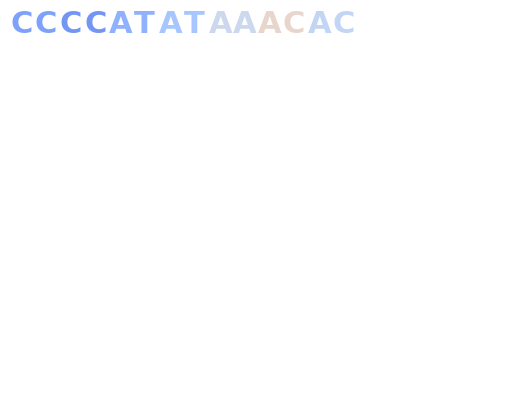

Max activation: 0.5257089138031006
Prototype :  TCTACCCGGT
Top 2 activated patch in test seq for this prototype:
 __________________CCCACCGCACATAT_TCAAACATTCCTAATAATATCTAGT


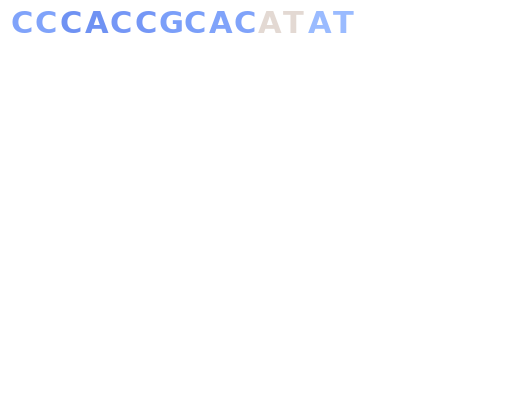

Max activation: 0.5141754746437073
Prototype :  TCTACCCGGT
Top 3 activated patch in test seq for this prototype:
 __________________CCCCAAAGAGTAAACCTAATAACGTTTACTAATAAAATAT


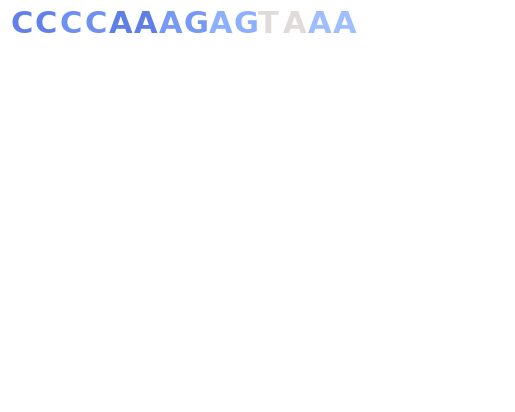

Max activation: 0.46903669834136963
Prototype :  TCTACCCGGT
Top 4 activated patch in test seq for this prototype:
 ________________CCACATCAACGAACATAAACCCAATATATTTAATAAGTCACA


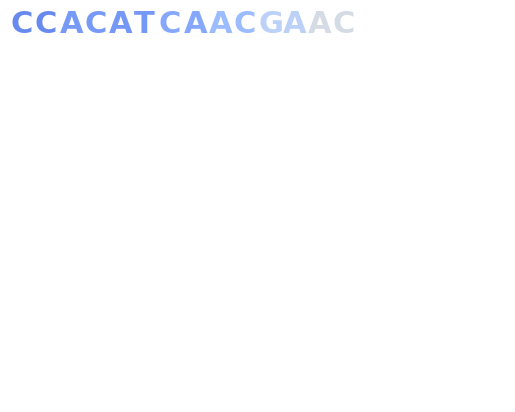

Max activation: 0.45242753624916077
Prototype :  TCTACCCGGT
Top 5 activated patch in test seq for this prototype:
 __________________CCCCGAGATCAAACACGTAAACAAGTAAATAACCAAATAT


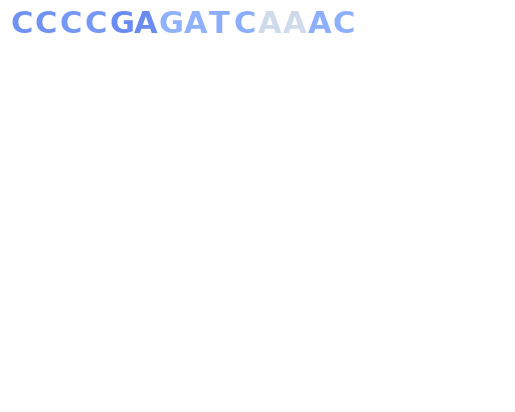

Max activation: 0.44621923565864563
Prototype :  TCTACCCGGT
Top 6 activated patch in test seq for this prototype:
 __________________CCCCATTTATTAAACAAAACAGTAAATAACCAAATATACT


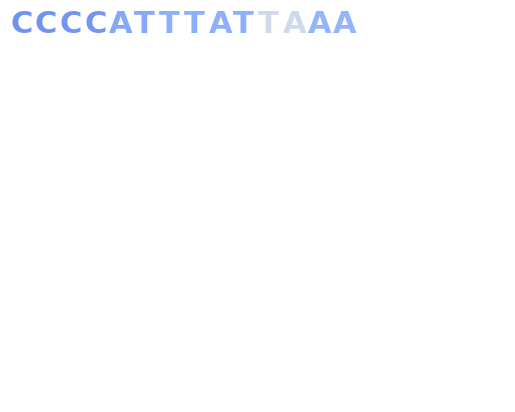

Max activation: 0.4390995502471924
Prototype :  TCTACCCGGT
Top 7 activated patch in test seq for this prototype:
 ______________________CCCCATTCAACTACAAACCAAGTATCTTAACACAGA


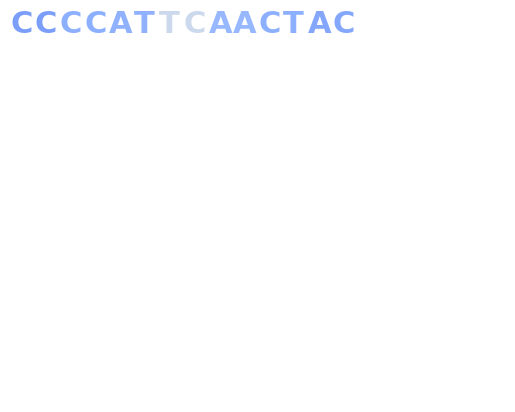

Max activation: 0.4316585063934326
Prototype :  TCTACCCGGT
Top 8 activated patch in test seq for this prototype:
 ________________CCCCTACCTATATAAAGCAATTATACTTAATTACTAACACAA


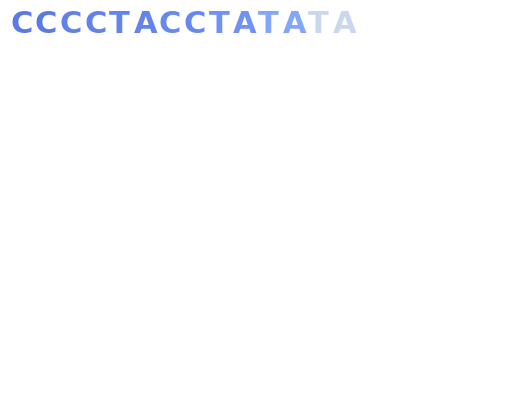

Max activation: 0.4238393306732178
Prototype :  TCTACCCGGT
Top 9 activated patch in test seq for this prototype:
 ____________________CCCCTCATACGTATATACCATCAAAATATTCTTAATAA


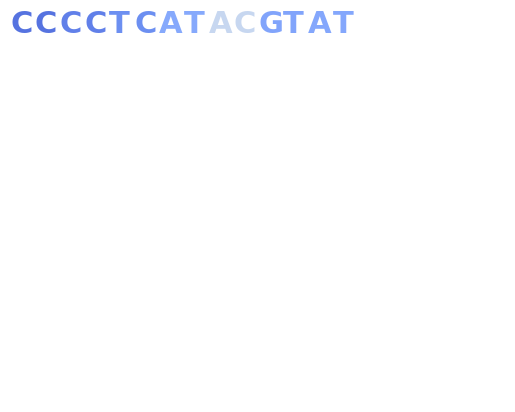

Max activation: 0.423260897397995
Prototype :  TCTACCCGGT
Top 10 activated patch in test seq for this prototype:
 ________________CCCCTTCTACTCACCACAAACTATTTATAATAACAAACGTAA


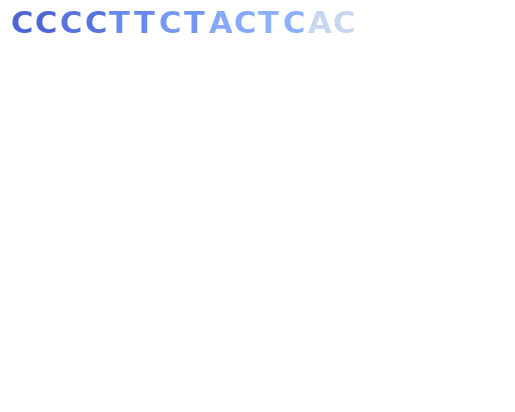

In [ ]:
for i in range(10):
    visualize_global_analysis(img_ind=i+1, prot_ind=100)

In [ ]:
def visualize_prototype_self_act(model_path='./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/',
                                prototype_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load('{}prototype_{}_activations.npy'.format(model_path, prototype_ind))
    act_map = np.repeat(act_map, repeats=2)
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load('{}prototype_{}_original.npy'.format(model_path, prototype_ind))
    proto_patch = np.load('{}prototype_{}_patch.npy'.format(model_path, prototype_ind))
    print("Prototype: ", array_to_str(proto_patch))
    input_seq = array_to_str(input_seq)

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

In [ ]:
# Each tuple is model_dir, specific_model, epoch for model
latent_weight_to_model = {
    1: ('base_feature/ablation_latent_1/', '250_19push0.7820.pth', '250'),
    0.9: ('base_feature/ablation_latent_0.9/', '200_4push0.7632.pth', '200'),
    0.8: ('base_feature/ablation_latent_0.8/', '300_5push0.8083.pth', '300'),
    0.7: ('base_feature/ablation_latent_0.7/', '250_16push0.7970.pth', '250'),
    0.6: ('base_feature/ablation_latent_0.6/', '300_15push0.7782.pth', '300'),
    0.5: ('base_feature/ablation_latent_0.5/', '450_12push0.8008.pth', '450'),
    0.4: ('base_feature/ablation_latent_0.4/', '300_12push0.7669.pth', '300'),
    0.3: ('base_feature/ablation_latent_0.3/', '350_17push0.7519.pth', '350'),
    0.2: ('base_feature/ablation_latent_0.2/', '250_19push0.7218.pth', '250'),
    0.1: ('base_feature/ablation_latent_0.1/', '250_7push0.7068.pth', '250'),
    0: ('base_feature/ablation_latent_0/', '350_19push0.5977.pth', '350')
}

target_latent_weight = 0.5
target_seq = 100
model_dir = latent_weight_to_model[target_latent_weight][0]
target_model = latent_weight_to_model[target_latent_weight][1]
epoch_num = latent_weight_to_model[target_latent_weight][2]

#visualize_prototype_self_act(model_path='./saved_models/{}/seq/epoch-{}/'.format(model_dir, epoch_num),
#                            prototype_ind=1)
for i in range(3):
    visualize_local_analysis(model_path='./test_local_seq_{}/{}{}/'.format(target_seq, model_dir, target_model),
            img_ind=i+1)


FileNotFoundError: [Errno 2] No such file or directory: './test_local_seq_100/base_feature/ablation_latent_0.5/450_12push0.8008.pth/most_activated_prototypes/top-1_prototype_activation_map.npy'

Max activation: 0.9996626973152161
CAATAATGAA


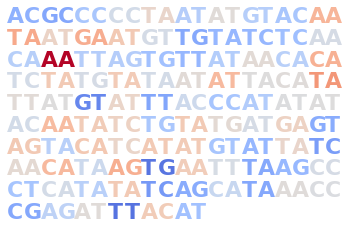

In [ ]:
visualize_local_analysis(model_path='./test_local_seq_250/base_feature/corrected_max_test_0.3/300_19push0.7632.pth/',
        img_ind=2)

Max activation: 0.999646008014679
ACTACTCTAT


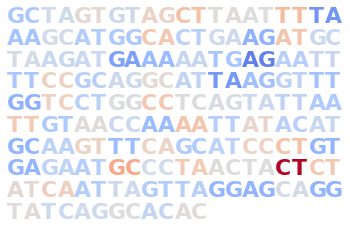

In [ ]:
visualize_local_analysis(model_path='./test_local_seq_50/base_feature/corrected_max_test_0.6/350_10push0.7820.pth/',
        img_ind=1)

Max activation: 0.7454721927642822
__GCTAGCGT


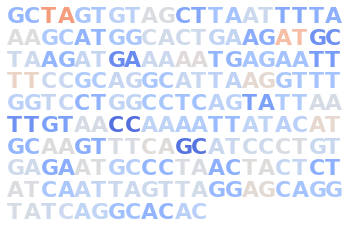

In [ ]:
visualize_local_analysis(model_path='./test_local_seq_50/base_feature/corrected_max_test_0.8/350_10push0.7895.pth/',
        type='top-4_class_prototypes',
        img_ind=9)